In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'C:/playdata/To_raise_a_child_well/data/dohee/'
sum_df = pd.read_excel(path+'전국데이터프레임2006_2021.xlsx', index_col = 0)
sum_df

,실업률,이혼율,고령화비율,혼인건수,소비자물가지수,출산아수/가임기여성의수,아파트전세지수,미분양주택지수,은행예금지수,경제활동참가율,지가변동률
시점,,,,,,,,,,,
1999-06-01,5.6,0.001352,NaN,36243.0,61.349,NaN,NaN,NaN,NaN,49.0,NaN
1999-07-01,5.6,0.001913,NaN,25464.0,61.140,NaN,NaN,NaN,NaN,48.7,NaN
1999-08-01,5.0,0.002503,NaN,19217.0,61.765,NaN,NaN,NaN,NaN,48.1,NaN
1999-09-01,4.2,0.002985,NaN,16485.0,61.921,NaN,NaN,NaN,NaN,49.2,NaN
1999-10-01,4.0,0.002003,NaN,24713.0,62.389,NaN,NaN,NaN,NaN,49.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,2.5,NaN,17.8,NaN,108.930,0.001486,102.8,102.8,1958348.3,55.1,NaN
2022-10-01,2.4,NaN,17.9,NaN,109.210,0.001486,101.4,101.4,1967290.0,55.0,NaN
2022-11-01,2.3,NaN,17.9,NaN,109.100,0.001486,99.0,99.0,1970661.1,55.1,NaN


In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 분리
from sklearn.model_selection import GridSearchCV, train_test_split
x = sum_df.drop(['출산아수/가임기여성의수'], axis = 1).loc['2006-01-01' : '2021-12-01'].values
y = sum_df['출산아수/가임기여성의수'].loc['2006-01-01' : '2021-12-01']
            
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_train.shape, x_test.shape

In [6]:
# 데이터 프레임
knn_reg_df = pd.DataFrame(index = ['mse', 'rmse', 'r2'])
dt_reg_df = pd.DataFrame(index = ['mse', 'rmse', 'r2'])
rf_reg_df = pd.DataFrame(index = ['mse', 'rmse', 'r2'])

# 객체 형성
knn_reg = KNeighborsRegressor()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
        
# 파라미터 설정
params_knn = {'n_neighbors': [2, 3, 4, 5]}
params_dt = {'max_depth': [2, 3, 4, 5]}
params_rf = {'max_depth': [2, 3, 4, 5], 'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# knn그리드서치
grid_search_knn = GridSearchCV(knn_reg, param_grid = params_knn, cv=5)
grid_search_knn.fit(x_train, y_train)
grid_search_knn.score()
y_pred_knn = grid_search_knn.predict(x_test)
r2 = r2_score(y_test, y_pred_knn) 
print(f'knn : {r2:.3f}')

# dt그리드서치
grid_search_dt = GridSearchCV(dt_reg, param_grid = params_dt, cv=5)
grid_search_dt.fit(x_train, y_train)
y_pred_dt = grid_search_dt.predict(x_test)
r2 = r2_score(y_test, y_pred_dt)
print(f'dt : {r2:.3f}')

# rf그리드서치
grid_search_rf = GridSearchCV(rf_reg, param_grid = params_rf, cv=5)
grid_search_rf.fit(x_train, y_train)
y_pred_rf = grid_search_rf.predict(x_test)
r2 = r2_score(y_test, y_pred_rf) 
print(f'rf : {r2:.3f}')

knn : 0.918
dt : 0.888
rf : 0.934


In [13]:
# knn test_score, train_score
grid_search_knn.score(x_test, y_test), grid_search_knn.score(x_train, y_train) 

(0.9177128657080384, 0.9160732001210499)

In [14]:
# dt test_score, train_score
grid_search_dt.score(x_test, y_test), grid_search_dt.score(x_train, y_train) 

(0.8876821406152436, 0.9518239596071736)

In [15]:
# rf test_score, train_score
grid_search_rf.score(x_test, y_test), grid_search_rf.score(x_train, y_train) 

(0.9335931245653054, 0.9598465154860018)

In [4]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [22]:
grid_search_rf.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [24]:
best_rf_reg = RandomForestRegressor(max_depth = 5, n_estimators = 100)
best_rf_reg.fit(x_train, y_train)
y_pred = best_rf_reg.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(r2)

test_score = best_rf_reg.score(x_test, y_test)
train_score = best_rf_reg.score(x_train, y_train)
print(f'test_score : {test_score}')
print(f'train_score : {train_score}')

0.9384692855901755
test_score : 0.9384692855901755
train_score : 0.9604475220355161


In [31]:
x_train

array([[2.40000000e+00, 1.64595561e-03, 1.17000000e+01, ...,
        9.80029100e+05, 5.02000000e+01, 4.60000000e-02],
       [4.80000000e+00, 2.42922724e-03, 1.28000000e+01, ...,
        1.07985680e+06, 5.08000000e+01, 1.81000000e-01],
       [3.70000000e+00, 2.82615497e-03, 1.52000000e+01, ...,
        1.44758880e+06, 5.42000000e+01, 3.84000000e-01],
       ...,
       [2.40000000e+00, 2.65647744e-03, 1.21000000e+01, ...,
        1.00433740e+06, 5.11000000e+01, 1.06000000e-01],
       [4.60000000e+00, 2.33976241e-03, 1.64000000e+01, ...,
        1.69781810e+06, 5.18000000e+01, 3.74000000e-01],
       [3.40000000e+00, 2.09877038e-03, 1.25000000e+01, ...,
        1.04127670e+06, 5.24000000e+01, 1.98000000e-01]])

In [38]:
best_rf_reg.feature_importances_

array([0.00510074, 0.01519527, 0.19914558, 0.01276725, 0.10726068,
       0.05415483, 0.05580836, 0.52008835, 0.01950511, 0.01097383])

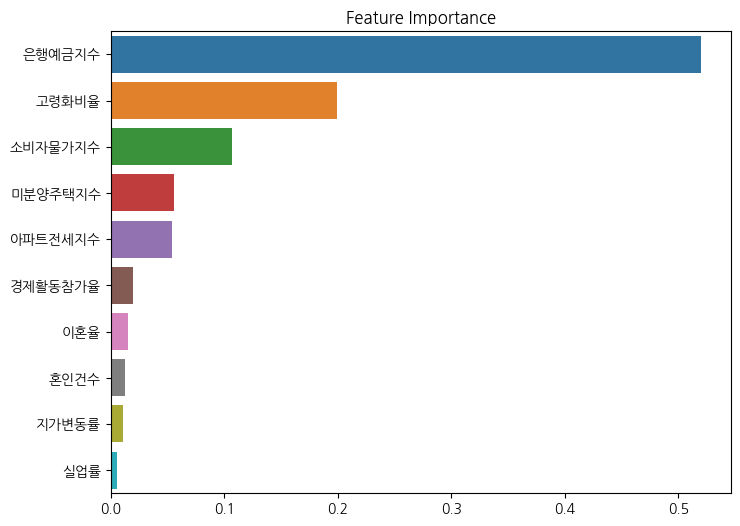

In [37]:
# 특성 중요도
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_imt = pd.Series(best_rf_reg.feature_importances_, index = sum_df.drop(['출산아수/가임기여성의수'], axis = 1).columns).sort_values(ascending=False)

mpl.rc('font', family='NanumGothic', size = 10)
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(x = ft_imt, y = ft_imt.index)
plt.show()

In [25]:
max(rf_reg_df.loc['r2'])

0.938

In [1]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor?

Init signature:
KNeighborsRegressor(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets
associated of the nearest neighbors in the training set.

Read more in the :ref:`User Guide <regression>`.

.. versionadded:: 0.9

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.